# WeatherPy
----

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import datetime
from scipy.stats import linregress
import json
import scipy.stats as st

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)

lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

635

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
#Set empty dictionary to store your information for the data frame
dict_df ={}

#Set the url and api key used to retrive the request and test 
url = f"http://api.openweathermap.org/data/2.5/weather?q="
api_key = f"&appid={weather_api_key}"
units = "&units=imperial"

# Print the below to show data retrieval is beginning
print("Beginning Data Retrieval")
print("--------------------------------")

#set counter for the record and set count
record = 1
set_count = 1

#Start for loop to get information from my API requests and store in empty list to create dataframe
for city in cities:
    #get request per city and store in request variable
    request = requests.get(f"{url}{city}{units}{api_key}").json()
    
    # Use Try except method in case of an error 
    try:
    # Get the the data needed for my dataframe and append to proper keys in dict_df dictionary
        dict_df.setdefault("City", []).append(request["name"])
        dict_df.setdefault("Lat", []).append(request["coord"]["lat"])
        dict_df.setdefault("Lng", []).append(request["coord"]["lon"])
        dict_df.setdefault("Max Temp", []).append(request["main"]["temp_max"])
        dict_df.setdefault("Humidity", []).append(request["main"]["humidity"])
        dict_df.setdefault("Cloudiness", []).append(request["clouds"]["all"])
        dict_df.setdefault("Wind Speed", []).append(request["wind"]["speed"])
        dict_df.setdefault("Country", []).append(request["sys"]["country"])
        dict_df.setdefault("Date", []).append(request["dt"])
        
    #Print the record , set number,  and city name and add 1 to record counter
        print(f"Processing Record {record} of set {set_count} | {city}")
        record += 1
        
    except:
    # Print error message if city not found
        print("City not found. Skipping...")
        
    # Check to see if record == 51 and if so reset to 1 and add 1 set_count
    if record == 51:
        record = 1
        set_count += 1
print("--------------------------------")
print("Data Retrieval Complete")
print("--------------------------------")

Beginning Data Retrieval
--------------------------------
Processing Record 1 of set 1 | tyup
Processing Record 2 of set 1 | arraial do cabo
Processing Record 3 of set 1 | yellowknife
Processing Record 4 of set 1 | saint-pierre
City not found. Skipping...
Processing Record 5 of set 1 | manama
Processing Record 6 of set 1 | vestmannaeyjar
Processing Record 7 of set 1 | quatre cocos
Processing Record 8 of set 1 | prince rupert
Processing Record 9 of set 1 | bloemfontein
Processing Record 10 of set 1 | ballina
Processing Record 11 of set 1 | vaini
Processing Record 12 of set 1 | dikson
Processing Record 13 of set 1 | albany
Processing Record 14 of set 1 | hobart
Processing Record 15 of set 1 | chicama
Processing Record 16 of set 1 | jamestown
Processing Record 17 of set 1 | nanortalik
Processing Record 18 of set 1 | haines junction
Processing Record 19 of set 1 | almaznyy
City not found. Skipping...
Processing Record 20 of set 1 | la paz
Processing Record 21 of set 1 | katsuura
Processing

Processing Record 39 of set 4 | burgeo
Processing Record 40 of set 4 | sioux lookout
Processing Record 41 of set 4 | talnakh
Processing Record 42 of set 4 | kollam
Processing Record 43 of set 4 | gayny
Processing Record 44 of set 4 | provideniya
City not found. Skipping...
Processing Record 45 of set 4 | torbay
City not found. Skipping...
Processing Record 46 of set 4 | bay roberts
Processing Record 47 of set 4 | jalu
Processing Record 48 of set 4 | belaya gora
Processing Record 49 of set 4 | charleston
Processing Record 50 of set 4 | sao joao da barra
Processing Record 1 of set 5 | yichang
Processing Record 2 of set 5 | asfi
Processing Record 3 of set 5 | sokolo
Processing Record 4 of set 5 | zhezkazgan
Processing Record 5 of set 5 | markova
Processing Record 6 of set 5 | maputo
Processing Record 7 of set 5 | obihiro
Processing Record 8 of set 5 | barcelos
Processing Record 9 of set 5 | ilhabela
Processing Record 10 of set 5 | samarai
City not found. Skipping...
Processing Record 11 o

Processing Record 31 of set 8 | altamira
Processing Record 32 of set 8 | virginia beach
Processing Record 33 of set 8 | sasovo
Processing Record 34 of set 8 | ambon
Processing Record 35 of set 8 | pangai
Processing Record 36 of set 8 | kichera
Processing Record 37 of set 8 | pombas
Processing Record 38 of set 8 | tecoanapa
Processing Record 39 of set 8 | ayorou
Processing Record 40 of set 8 | verkh-usugli
Processing Record 41 of set 8 | santa isabel do rio negro
Processing Record 42 of set 8 | vardo
Processing Record 43 of set 8 | maridi
Processing Record 44 of set 8 | iqaluit
Processing Record 45 of set 8 | coari
Processing Record 46 of set 8 | vieux-habitants
Processing Record 47 of set 8 | awjilah
Processing Record 48 of set 8 | baijiantan
Processing Record 49 of set 8 | constantine
Processing Record 50 of set 8 | simbahan
Processing Record 1 of set 9 | thompson
Processing Record 2 of set 9 | katobu
Processing Record 3 of set 9 | castro
Processing Record 4 of set 9 | jaguey grande
P

Processing Record 17 of set 12 | melfi
City not found. Skipping...
Processing Record 18 of set 12 | damietta
Processing Record 19 of set 12 | teya
Processing Record 20 of set 12 | ishim
Processing Record 21 of set 12 | qaqortoq
Processing Record 22 of set 12 | alanya
Processing Record 23 of set 12 | ilulissat
Processing Record 24 of set 12 | port hawkesbury
Processing Record 25 of set 12 | gibara
Processing Record 26 of set 12 | sambava
Processing Record 27 of set 12 | lima duarte
Processing Record 28 of set 12 | evanton
Processing Record 29 of set 12 | hervey bay
Processing Record 30 of set 12 | cabo san lucas
City not found. Skipping...
Processing Record 31 of set 12 | thung song
Processing Record 32 of set 12 | onega
Processing Record 33 of set 12 | cidreira
Processing Record 34 of set 12 | poya
Processing Record 35 of set 12 | sahuaripa
Processing Record 36 of set 12 | severo-yeniseyskiy
Processing Record 37 of set 12 | lipovu
Processing Record 38 of set 12 | nueva gorgona
Processi

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# Convert to Dataframe
df = pd.DataFrame(dict_df)

# Export to a .csv file within the output directory
df.to_csv("../output_data/cities.csv")

#Display the DataFrame
df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Tyup,42.7276,78.3648,29.64,88,73,1.77,KG,1612747877
1,Arraial do Cabo,-22.9661,-42.0278,72.36,81,100,7.61,BR,1612747356
2,Yellowknife,62.4560,-114.3525,-34.01,67,40,8.05,CA,1612747077
3,Saint-Pierre,-21.3393,55.4781,80.60,61,90,6.91,RE,1612747381
4,Manama,26.2154,50.5832,64.40,77,0,4.61,BH,1612747816


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
# Use summary table to get the max and see if its above 100 for humidity 
df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,589.000000,589.000000,589.000000,589.000000,589.000000,589.000000,5.890000e+02
mean,20.584981,19.320556,48.584754,73.983022,53.144312,7.960424,1.612748e+09
std,33.012189,90.567854,31.988520,18.694093,40.471346,5.973277,2.697411e+02
min,-54.800000,-175.200000,-36.690000,10.000000,0.000000,0.290000,1.612747e+09
25%,-5.556900,-62.950000,24.800000,67.000000,5.000000,3.490000,1.612747e+09
50%,22.526900,23.533300,60.800000,78.000000,59.000000,6.910000,1.612748e+09
75%,48.005600,103.534700,75.200000,88.000000,96.000000,10.360000,1.612748e+09
max,78.218600,179.316700,95.140000,100.000000,100.000000,43.730000,1.612748e+09


In [7]:
# Get the indices of cities that have humidity over 100%.
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
if len(df.loc[df["Humidity"] >= 100]) > 0:
    clean_city_data = pd.DataFrame.copy(df).drop(df.loc[df["Humidity"] >100].index)
else:
    clean_city_data = pd.DataFrame.copy(df)

# print out lenghts of original and clean data to see if the values were dropped or not 
len(df), len(clean_city_data)

(589, 589)

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

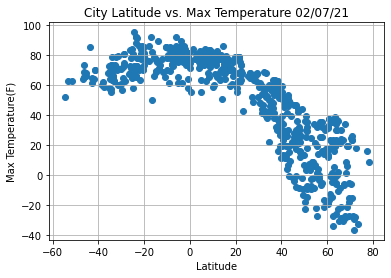

In [8]:
#Date time conversion and formating syntax
    #datetime.date.fromtimestamp(1612267701).strftime("%m/%d/%y")

#Plot the scatter plot 
plt.scatter(clean_city_data["Lat"], clean_city_data["Max Temp"])
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Max Temperature(F)")
plt.title("City Latitude vs. Max Temperature " + datetime.date.fromtimestamp(df["Date"][0]).strftime("%m/%d/%y"))

# Save PNG image to output_data
plt.savefig("../output_data/Lat_v_Temp.png")

## Latitude vs. Humidity Plot

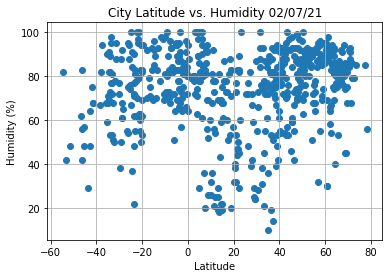

In [9]:
#Plot the scatter plot 
plt.scatter(clean_city_data["Lat"], clean_city_data["Humidity"])
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity " + datetime.date.fromtimestamp(df["Date"][0]).strftime("%m/%d/%y"))

#Save PNG image to output_data
plt.savefig("../output_data/Lat_v_Hum.png")

## Latitude vs. Cloudiness Plot

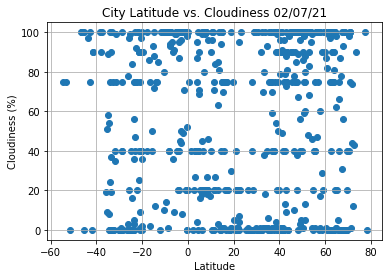

In [10]:
#Plot the scatter plot 
plt.scatter(clean_city_data["Lat"], clean_city_data["Cloudiness"])
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness " + datetime.date.fromtimestamp(df["Date"][0]).strftime("%m/%d/%y"))

#Save PNG image to output_data
plt.savefig("../output_data/Lat_v_Cloud.png")

## Latitude vs. Wind Speed Plot

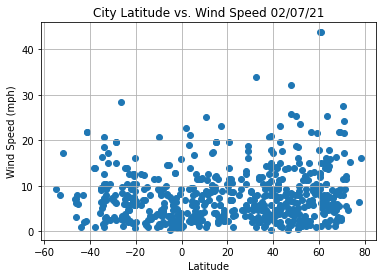

In [11]:
#Plot the scatter plot 
plt.scatter(clean_city_data["Lat"], clean_city_data["Wind Speed"])
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("City Latitude vs. Wind Speed " + datetime.date.fromtimestamp(df["Date"][0]).strftime("%m/%d/%y"))

#Save PNG image to output_data
plt.savefig("../output_data/Lat_v_Wind.png")

## Linear Regression

In [12]:
#Split the data into Northern and Souther hemisphere using latitude

northern_hem = clean_city_data.loc[clean_city_data["Lat"] > 0]
southern_hem = clean_city_data.loc[clean_city_data["Lat"]< 0]

#check numbers add to total length of clean data
len(northern_hem), len(southern_hem)

(403, 186)

In [13]:
# Define function used for each linear regression
def linear_regressions(x_column,y_column):
    x = x_column
    y = y_column
    (slope, intercept, rval, p_value, st) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_column, y_column)
    plt.xlabel("Latitude")
    plt.ylabel(y_column.name)
    plt.plot(x,regress_values,"r-")
    print(f"The R Value is: {rval}")
    print(f"R Squared is: {rval** 2}")
    plt.annotate(line_eq,(max(x),max(y)),fontsize=15,color="red")

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The R Value is: -0.8570870151692754
R Squared is: 0.7345981515717778


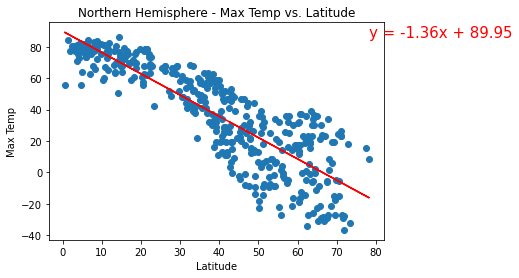

In [14]:
linear_regressions(northern_hem["Lat"], northern_hem["Max Temp"])
plt.title("Northern Hemisphere - Max Temp vs. Latitude")
plt.savefig("../output_data/North_Temp_Lat.png")

#### Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The R Value is: 0.4574281087111087
R Squared is: 0.2092404746390219


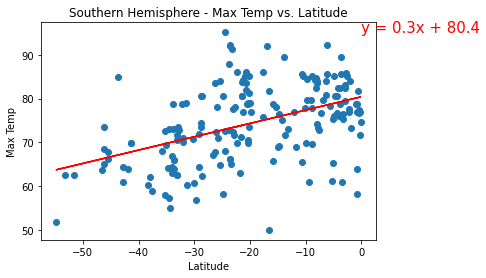

In [15]:
linear_regressions(southern_hem["Lat"], southern_hem["Max Temp"])
plt.title("Southern Hemisphere - Max Temp vs. Latitude")
plt.savefig("../output_data/South_Temp_Lat.png")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The R Value is: 0.2834303954870385
R Squared is: 0.08033278908593906


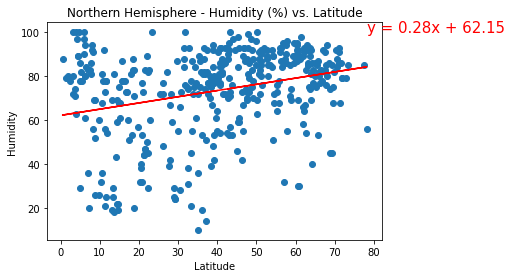

In [16]:
linear_regressions(northern_hem["Lat"], northern_hem["Humidity"])
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude")
plt.savefig("../output_data/North_Hum_Lat.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The R Value is: 0.34615508187493366
R Squared is: 0.11982334070784202


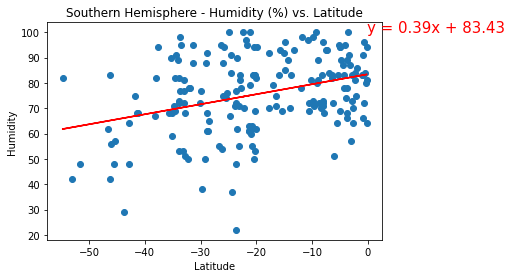

In [17]:
linear_regressions(southern_hem["Lat"], southern_hem["Humidity"])
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude")
plt.savefig("../output_data/South_Hum_Lat.png")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The R Value is: 0.15825234107567512
R Squared is: 0.025043803455931813


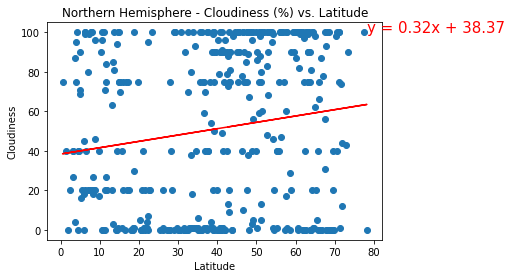

In [18]:
linear_regressions(northern_hem["Lat"], northern_hem["Cloudiness"])
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude")
plt.savefig("../output_data/North_Cloud_Lat.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The R Value is: 0.18232815976234226
R Squared is: 0.033243557842322205


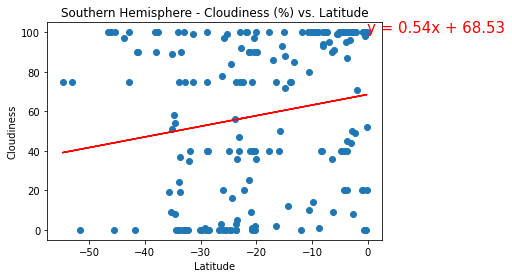

In [19]:
linear_regressions(southern_hem["Lat"], southern_hem["Cloudiness"])
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude")
plt.savefig("../output_data/South_Cloud_Lat.png")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The R Value is: 0.11213214297030248
R Squared is: 0.012573617487112356


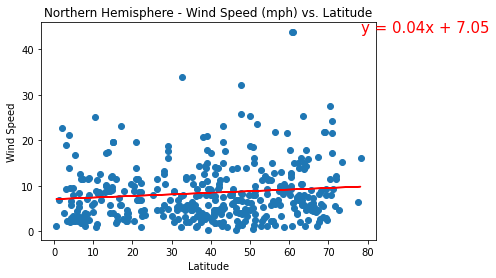

In [20]:
linear_regressions(northern_hem["Lat"], northern_hem["Wind Speed"])
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude")
plt.savefig("../output_data/North_Wind_Lat.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The R Value is: -0.280045295657461
R Squared is: 0.07842536761987474


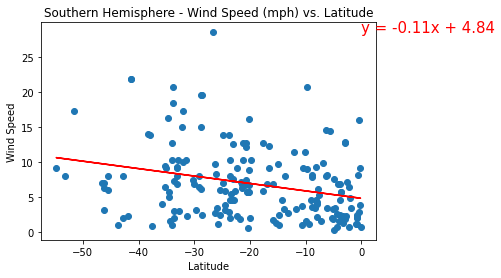

In [21]:
linear_regressions(southern_hem["Lat"], southern_hem["Wind Speed"])
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude")
plt.savefig("../output_data/South_Wind_Lat.png")

##### OBSERVATIONS

1) In the Northern Hemisphere there is a high negative correlation between latitude and max temperature. The further north from the equator you go the lower the temperature becomes. The correlation coefficient is roughly -.84 which is close to -1 (a perfect negative relationship).

2) The scatter plot with the least amount of correlation is the "Northern Hemisphere - Wind Speed (mph) vs. Latitude" with a correlation coefficient of roughly .11. All these comparisons did not have much correlation besides the correlation between the max temperature and latitude.

3) The only linear regression model that fits the data somewhat well is the "Northern Hemisphere - Max Temp vs. Latitude Linear Regression model". The R-squared returned a number around .73 which is close to 1 and shows that it tracks the movement of the data quite well. The same comparison for the southern hemisphere did not give that great of results but I believe it is because there was less data used in the modeling and correlation analysis.